In [10]:
import sys
!{sys.executable} -m pip install --upgrade google-cloud-bigquery[pandas]

Requirement already up-to-date: google-cloud-bigquery[pandas] in /home/akomar/anaconda3/lib/python3.7/site-packages (1.8.1)


In [1]:
%load_ext google.cloud.bigquery

In [10]:
%%bigquery events_per_day
SELECT
    doc_type,
    submission_date_s3,
    COUNT(*) AS count
FROM `spark-bigquery-dev.test.events_slice_copy`
WHERE submission_date_s3 >= DATE('2019-01-15')
GROUP BY submission_date_s3, doc_type
ORDER BY submission_date_s3, doc_type DESC

,doc_type,submission_date_s3,count
0,main,2019-01-15,1077064
1,event,2019-01-15,177252391
2,main,2019-01-16,1047294
3,event,2019-01-16,170125826
4,main,2019-01-17,1054932
5,event,2019-01-17,188005403
6,main,2019-01-18,965369
7,event,2019-01-18,179968608
8,main,2019-01-19,581929
9,event,2019-01-19,102649790


In [9]:
%matplotlib inline

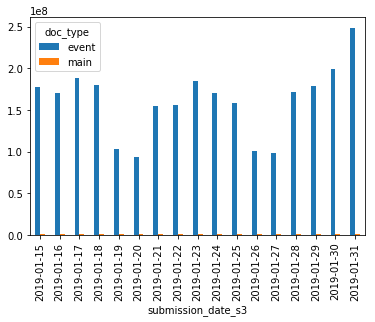

In [27]:
import pandas as pd
pd.pivot_table(events_per_day,index=["submission_date_s3"], values="count", columns="doc_type").plot(kind='bar')

In [28]:
from google.cloud import bigquery
client = bigquery.Client()
sql = """
SELECT
    doc_type,
    submission_date_s3,
    COUNT(*) AS count
FROM `spark-bigquery-dev.test.events_slice_copy`
WHERE submission_date_s3 >= DATE('2019-01-15')
GROUP BY submission_date_s3, doc_type
ORDER BY submission_date_s3, doc_type DESC
"""
df = client.query(sql).to_dataframe()
df.head()

,doc_type,submission_date_s3,count
0,main,2019-01-15,1077064
1,event,2019-01-15,177252391
2,main,2019-01-16,1047294
3,event,2019-01-16,170125826
4,main,2019-01-17,1054932


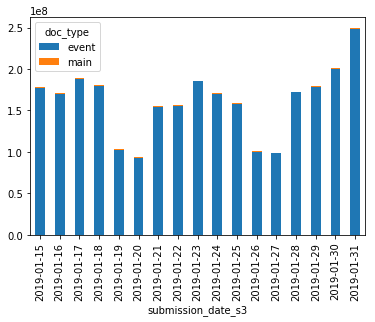

In [29]:
pd.pivot_table(df,index=["submission_date_s3"], values="count", columns="doc_type").plot(kind='bar', stacked=True)